In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from notebooks.helpers.models.embedding_model import PredictionModel
from generate_embeddings import get_wine_dataframe, get_food_dataframe
# from notebooks.helpers.prep.view_embeddings import view_embeddings_of_ingredient
from generate_pairings import compute_embedding_food_ingredients, get_the_closest_embedding, get_food_embedding_dict, get_descriptor_frequencies, get_production_wines, generate_pairing_for_ingredients, normalize_production_wines
import networkx as nx
from pyvis.network import Network
from pathlib import Path
from node2vec import Node2Vec
from kg_generation import create_wine_triplets, create_variety_descriptor_triplets, create_food_triplets

%matplotlib inline


In [4]:
KG = pd.concat([create_variety_descriptor_triplets(), create_wine_triplets(), create_food_triplets()], axis=0)

In [5]:
# KG = pd.DataFrame({'head': triplets['heads'], "tail": triplets['tails'], 'edges': triplets['edges']
# })
# G=nx.from_pandas_edgelist(KG, "head", "tail", edge_key = 'labels', create_using=nx.MultiDiGraph())

G = nx.DiGraph()
for _, row in KG.iterrows():
    G.add_edge(row['head'], row['tail'], label=row['edges'])
    # G.nodes[row['tail']]['label'] = row['node_label']

In [11]:
G.nodes

NodeView(('Syrah Columbia Valley, Washington, USA', 'fruit', 'herb', 'berry', 'spice', 'cherry', 'Cabernet Franc San Francisco Bay, Central Coast, California, USA', 'plum', 'oak', 'Chardonnay Mendocino, North Coast, California, USA', 'apple', 'pear', 'ripe', 'vanilla', 'Sangiovese Tuscany, Central Italy, Italy', 'black_cherry', 'leather', 'Pinot Grigio Trento, Northeast Italy, Italy', 'white', 'citrus', 'green', 'Petite Sirah Columbia Valley, Washington, USA', 'purple', 'dark', 'Aglianico, Italian Red Basilicata, Southern Italy, Italy', 'licorice', 'blackberry', 'Bordeaux-style Red Blend Galilee, Israel', 'raspberry', 'Cabernet Sauvignon Curico Valley, Central Valley, Chile', 'cassis', 'Sauvignon Blanc Mendocino, North Coast, California, USA', 'lemon', 'grapefruit', 'Pinot Noir Casablanca Valley, Aconcagua Region, Chile', 'Red Blends, Red Blends Puglia, Southern Italy, Italy', 'juicy', 'Grenache Navarra, Northeast Spain, Spain', 'Riesling Santa Barbara, Central Coast, California, USA',

In [14]:
model = Node2Vec(G, dimensions=128, walk_length=15, num_walks=200, workers=4)
# Embed nodes
model = model.fit(window=10, min_count=1)


# Get the vector of node '1'
model.wv.get_vector('Chardonnay')

Computing transition probabilities:   0%|          | 0/338 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 701.40it/s]


array([ 1.11586243e-01, -3.68144751e-01,  4.67726141e-02, -4.83876675e-01,
        2.39511520e-01, -1.15239307e-01,  3.63799542e-01,  1.92971736e-01,
        4.47454691e-01,  7.31590465e-02,  3.22501987e-01,  3.68514240e-01,
       -2.31547028e-01, -9.99446586e-02,  7.13610470e-01, -3.45111378e-02,
       -1.26112446e-01, -3.26741636e-01, -4.13795769e-01,  4.52690363e-01,
        3.52269471e-01,  1.62423737e-02, -2.54436284e-01, -4.32828426e-01,
       -5.38241744e-01,  2.75159240e-01, -1.06802449e-01, -2.84026787e-02,
        8.84723589e-02, -3.69632125e-01,  2.69523889e-01,  1.22598305e-01,
       -2.76778996e-01,  3.56997132e-01, -1.22730887e+00,  1.70153484e-01,
        2.15538964e-01, -3.61493230e-01, -5.55456430e-02, -3.01257879e-01,
       -2.16345400e-01,  1.89552844e-01, -6.09548092e-01, -5.43867163e-02,
        4.54565465e-01, -7.04577804e-01, -4.82030176e-02, -4.10165414e-02,
       -3.67559820e-01,  1.91708617e-02, -2.98619390e-01,  7.81679004e-02,
        4.12673891e-01,  

In [19]:
for node, _ in model.wv.most_similar('cherry'):
    print((node, _))

('berry', 0.9759516716003418)
('raspberry', 0.9751335978507996)
('plum', 0.9578681588172913)
('cassis', 0.9505978226661682)
('earthy', 0.9440017938613892)
('herb', 0.9311782121658325)
('black_cherry', 0.9122941493988037)
('blackberry', 0.9073793292045593)
('leather', 0.891248881816864)
('cedar', 0.8756580352783203)


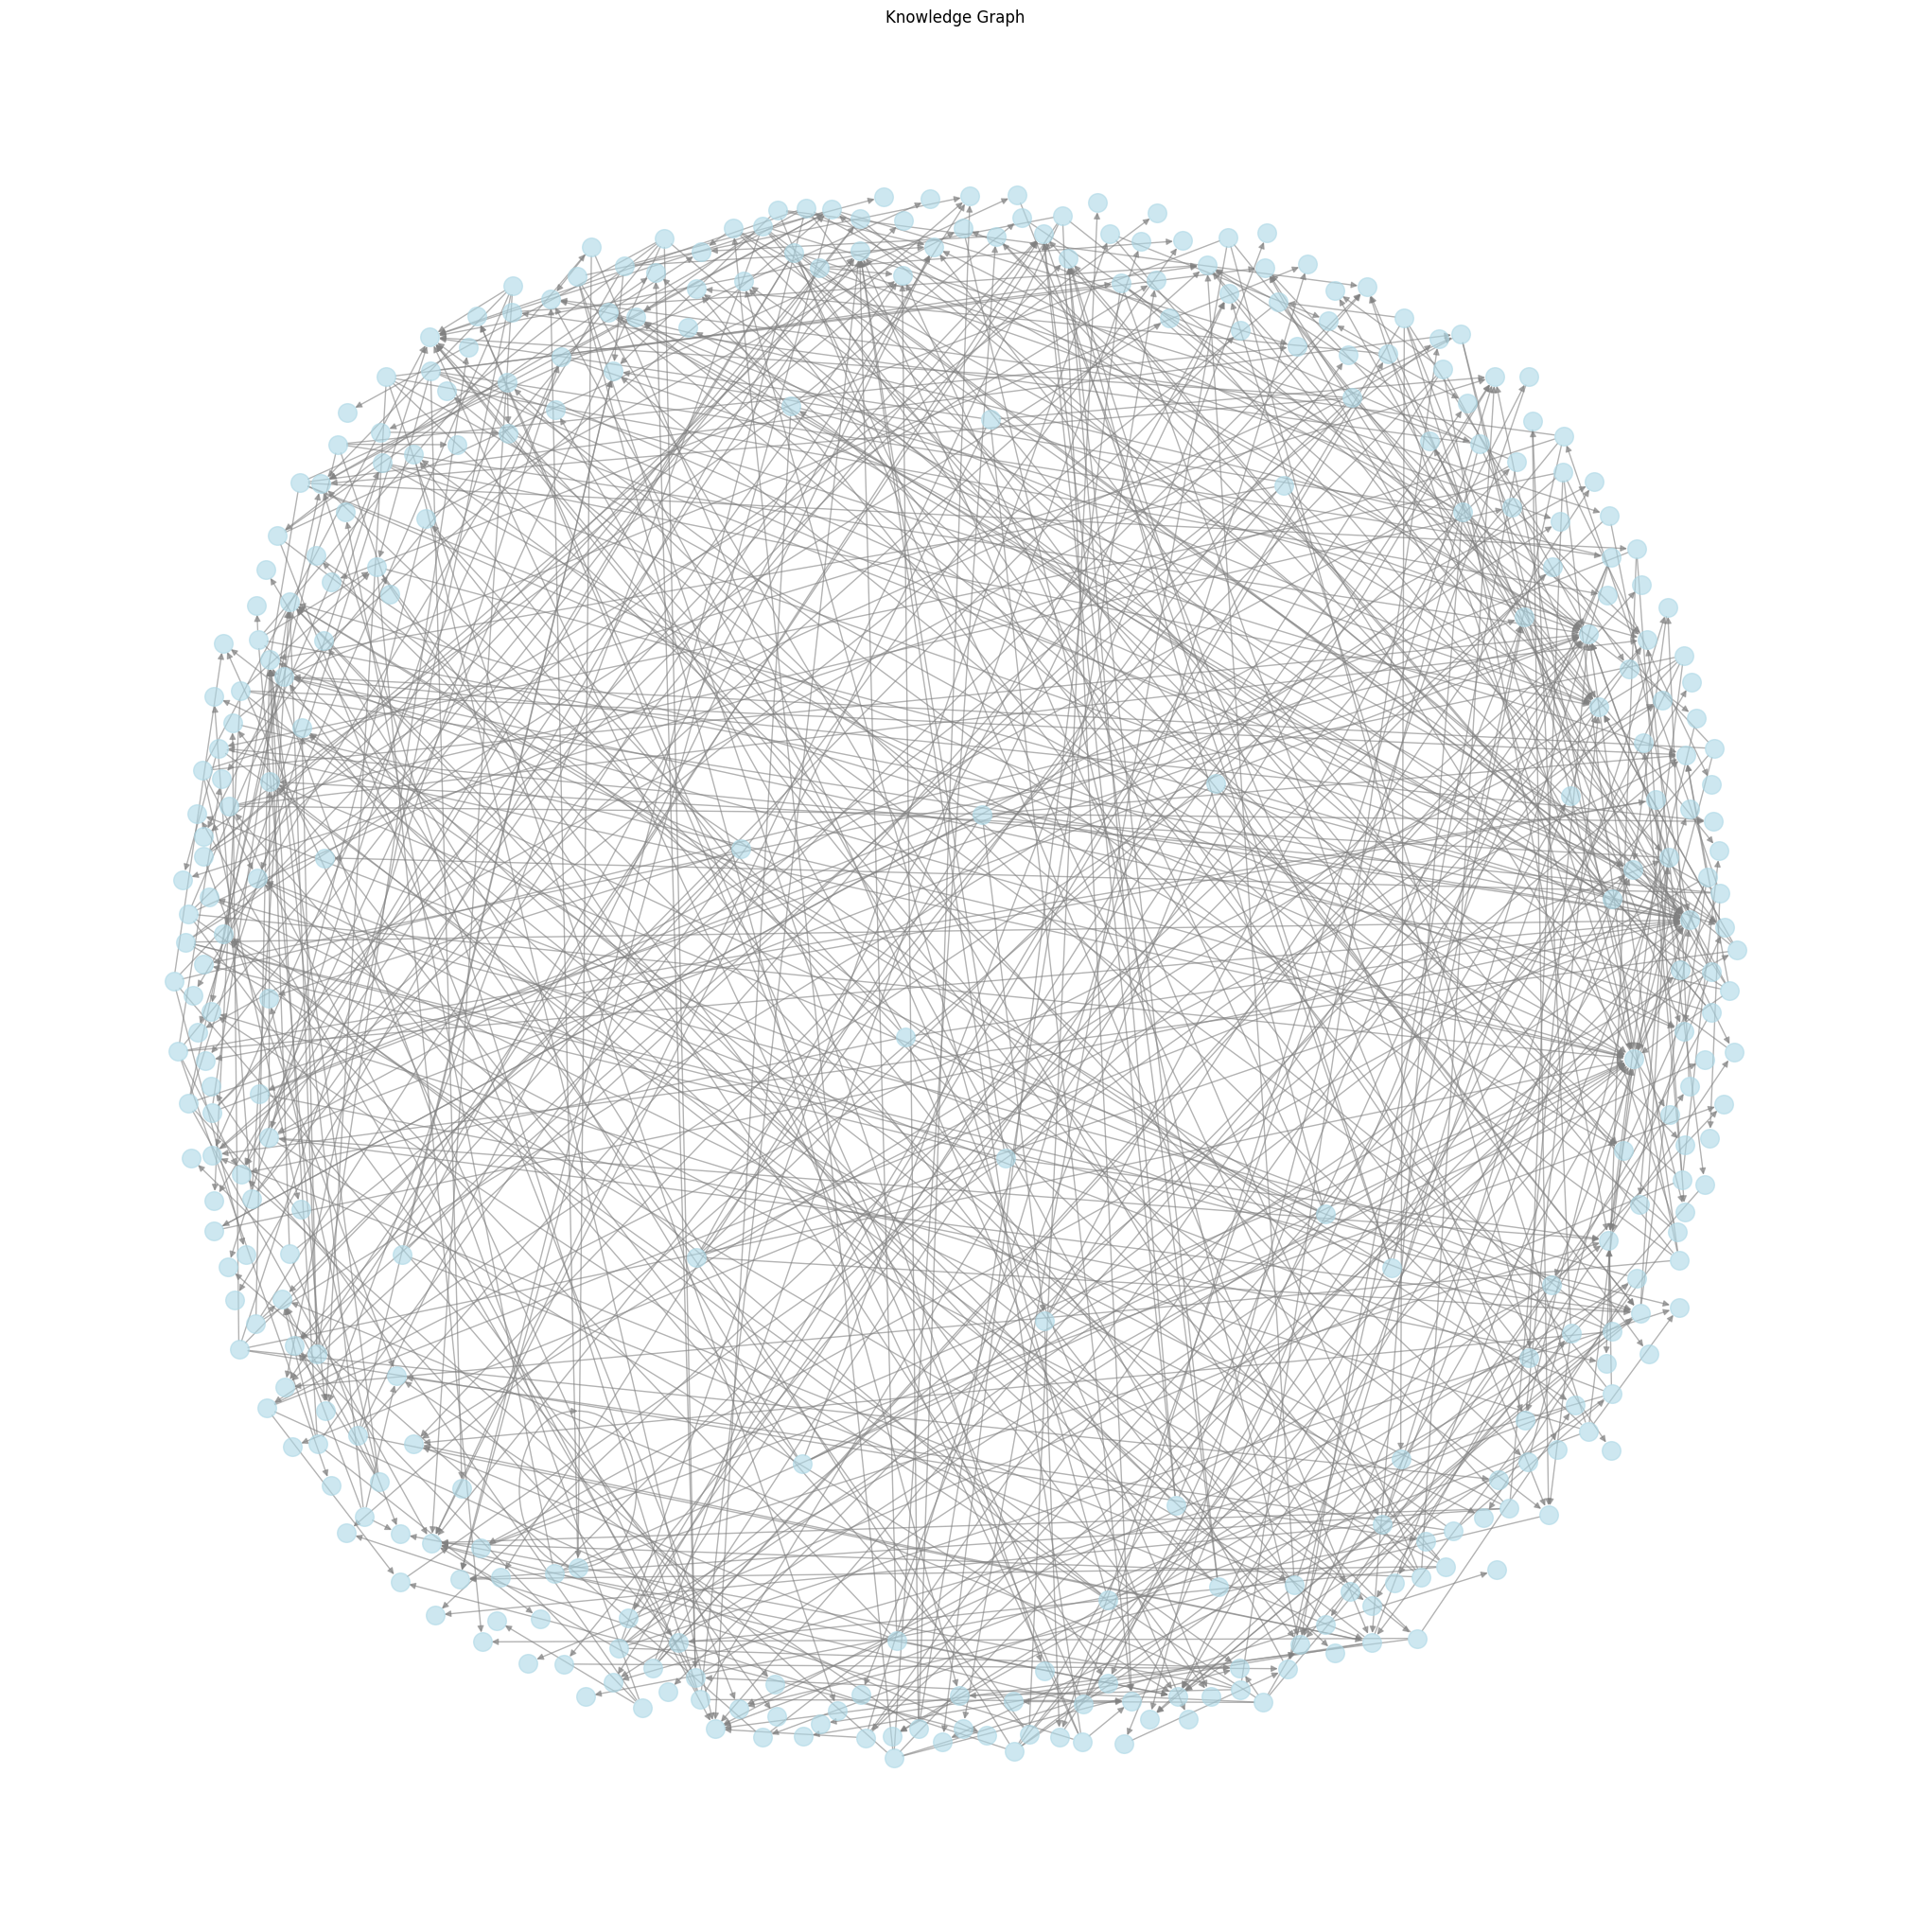

In [17]:
pos = nx.spring_layout(G, seed=42, k=1.5)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(20, 20))
nx.draw(G, pos, font_size=8, node_size=200, node_color='lightblue', edge_color='gray', alpha=0.6)
# nx.draw_networkx_edge_labels(G, pos, font_size=3, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

In [18]:
net = Network(notebook = True, cdn_resources = "remote",
                bgcolor = "#222222",
                font_color = "white",
                height = "750px",
                width = "100%",
                select_menu = True,
                filter_menu = True,
)
net.show_buttons(filter_="physics")
net.from_nx(G)
net.show("nx.html")

nx.html


In [ ]:
# net.set_options()